<a href="https://colab.research.google.com/github/JaganFoundr/PyTorchNN/blob/main/Image%20Classification/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import SubsetRandomSampler, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#2
dataset=CIFAR10(root='./data', download=True, train=True, transform=transforms.ToTensor())
testset=CIFAR10(root='./data', download=True, train=False, transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:03<00:00, 48.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


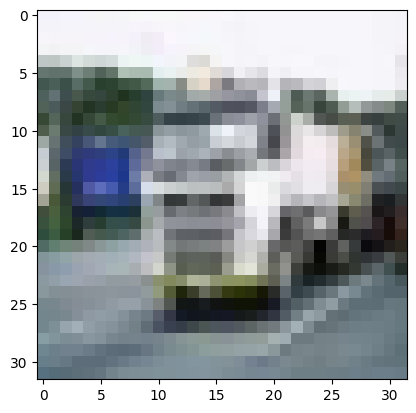

object number:  9
object name:  truck


In [3]:
#3
images, labels = dataset[1000]
rgb_images=images.permute(1,2,0).numpy()
objectname=dataset.classes[labels]
plt.imshow(rgb_images)
plt.show()
print("object number: ", labels)
print("object name: ", objectname)

In [4]:
images.shape

torch.Size([3, 32, 32])

In [5]:
#4
def split(data, valid_percent, seed):
  valid_data=int(data*valid_percent)
  seed=np.random.seed(seed)
  index=np.random.permutation(data)
  return index[valid_data:], index[:valid_data]

training_data, validation_data=split(len(dataset), 0.2, 40)
print("training data: ", len(training_data))
print("validation data: ", len(validation_data))

print("portion of the validation data: ", validation_data[:10])

training data:  40000
validation data:  10000
portion of the validation data:  [22599 38540 32995 37372 26774   578 34812 28062  5012 11968]


In [6]:
#5
train_sampler=SubsetRandomSampler(training_data)
validation_sampler=SubsetRandomSampler(validation_data)

batch_size=100

training_loader=DataLoader(dataset, batch_size, sampler=train_sampler)
validation_loader=DataLoader(dataset, batch_size, sampler=validation_sampler)

In [7]:
#6
CIFARmodel=nn.Sequential(

nn.Conv2d(3,16,3,1,1), #16x16x16
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x8x8
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x4x4
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x2x2
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x1x1
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Flatten(),
nn.Linear(16,10)

)

In [8]:
#7
for images, labels in training_loader:
  prediction=CIFARmodel(images)

In [9]:
#8
print(prediction[10])

#9
sum_check=torch.sum(prediction[10])
print(sum_check)

changed_pred=F.softmax(prediction, dim=1)
print(torch.sum(changed_pred[10]))

print(changed_pred[10])

tensor([-0.1320,  0.2264,  0.1036, -0.2345, -0.2008, -0.2490, -0.1818, -0.2069,
         0.1106, -0.2304], grad_fn=<SelectBackward0>)
tensor(-0.9950, grad_fn=<SumBackward0>)
tensor(1., grad_fn=<SumBackward0>)
tensor([0.0954, 0.1365, 0.1207, 0.0861, 0.0891, 0.0849, 0.0908, 0.0885, 0.1216,
        0.0865], grad_fn=<SelectBackward0>)


In [10]:
#10
_, pred = torch.max(prediction, dim=1)
print(pred)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])


In [11]:
#11
labels

tensor([1, 6, 5, 9, 5, 8, 5, 3, 0, 7, 3, 2, 5, 2, 4, 3, 6, 9, 9, 0, 3, 4, 6, 2,
        2, 3, 3, 3, 8, 4, 4, 8, 3, 0, 9, 0, 4, 0, 4, 0, 7, 5, 1, 8, 8, 0, 6, 6,
        9, 9, 3, 2, 0, 7, 4, 9, 8, 5, 3, 3, 2, 9, 4, 1, 9, 0, 6, 8, 7, 2, 9, 1,
        2, 4, 6, 2, 2, 5, 3, 5, 3, 6, 6, 6, 7, 3, 0, 4, 3, 1, 8, 2, 7, 4, 5, 3,
        4, 6, 2, 6])

In [12]:
#12
loss_fn=F.cross_entropy


In [13]:
#13
opt=torch.optim.Adam(CIFARmodel.parameters(), lr=0.005)


In [14]:
#14
def accuracy(outputs, labels):
  _,pred=torch.max(outputs, dim=1)
  return torch.sum(pred==labels).item()/len(pred)*100

In [15]:
#15
def loss_batch(CIFARmodel, loss_fn, images, labels, opt, metrics=accuracy):
  prediction=CIFARmodel(images)
  loss=loss_fn(prediction, labels)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result=None
  if metrics is not None:
    metric_result=metrics(prediction, labels)

  return loss.item(), len(images), metric_result

In [16]:
#16
def evaluate(CIFARmodel, loss_fn, validation_loader, metrics=accuracy):
  with torch.no_grad():
    validation_result=[loss_batch(CIFARmodel, loss_fn, images, labels, opt=None, metrics=accuracy) for images, labels in validation_loader]

    losses, nums, metric = zip(*validation_result)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums))/total

    metric_result=None
    if metrics is not None:
      metric_result = np.sum(np.multiply(metric, nums))/total

  return avg_loss, total, metric_result

In [17]:
#17
def train(nepochs, CIFARmodel, loss_fn, images, labels, training_loader, validation_loader, opt, metrics=accuracy):
  for epoch in range(nepochs):
    CIFARmodel.train()
    for images, labels in training_loader:
      train_loss,_,train_acc = loss_batch(CIFARmodel, loss_fn, images, labels, opt, metrics=accuracy)

    CIFARmodel.eval()
    valid_loss,_,valid_acc = evaluate(CIFARmodel, loss_fn, validation_loader, metrics=accuracy)

    print(f"epoch {epoch+1}/{nepochs}: ")
    print(f"Training loss: {train_loss:.4f} and Validation loss: {valid_loss:.4f}")
    print(f"Training accuracy: {train_acc:.2f}% and Validation accuracy: {valid_acc:.2f}%")

  return train_loss, valid_loss, train_acc,valid_acc

train_loss, valid_loss, train_acc,valid_acc= train(10, CIFARmodel, loss_fn, images, labels, training_loader, validation_loader, opt, metrics=accuracy)

epoch 1/10: 
Training loss: 1.4922 and Validation loss: 1.6488
Training accuracy: 41.00% and Validation accuracy: 38.01%
epoch 2/10: 
Training loss: 1.4877 and Validation loss: 1.4828
Training accuracy: 48.00% and Validation accuracy: 45.93%
epoch 3/10: 
Training loss: 1.2279 and Validation loss: 1.3948
Training accuracy: 59.00% and Validation accuracy: 49.27%
epoch 4/10: 
Training loss: 1.3077 and Validation loss: 1.3670
Training accuracy: 51.00% and Validation accuracy: 49.95%
epoch 5/10: 
Training loss: 1.4248 and Validation loss: 1.3019
Training accuracy: 51.00% and Validation accuracy: 52.95%
epoch 6/10: 
Training loss: 1.2395 and Validation loss: 1.2757
Training accuracy: 61.00% and Validation accuracy: 54.61%
epoch 7/10: 
Training loss: 1.1501 and Validation loss: 1.2592
Training accuracy: 58.00% and Validation accuracy: 53.92%
epoch 8/10: 
Training loss: 1.2157 and Validation loss: 1.2343
Training accuracy: 63.00% and Validation accuracy: 55.19%
epoch 9/10: 
Training loss: 1.21

In [18]:
#18
def prediction(images, CIFARmodel):
  images = images.unsqueeze(0)
  prediction = CIFARmodel(images)
  _, pred = torch.max(prediction, dim=1)
  return pred[0].item()

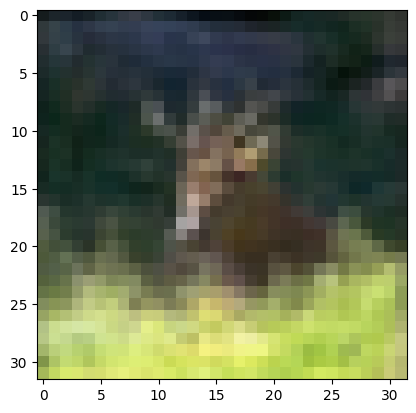

object name:  deer
predicted:  deer


In [24]:
#19
images, labels = testset[1801]
objectname=dataset.classes[labels]
rgb_images=images.permute(1,2,0).numpy()
plt.imshow(rgb_images)
plt.show()
print("object name: ",objectname)
print("predicted: ",dataset.classes[prediction(images,CIFARmodel)])

In [20]:
#20
torch.save(CIFARmodel.state_dict(),'CIFAR.pth')
CIFARmodel.state_dict()

OrderedDict([('0.weight',
              tensor([[[[-7.1136e-02,  1.1256e-01,  2.1077e-01],
                        [-1.8197e-01,  1.0843e-02,  1.4154e-01],
                        [-3.5677e-02, -1.2784e-01,  3.8405e-01]],
              
                       [[-3.7297e-01, -1.4746e-01,  1.2787e-01],
                        [-1.9202e-01, -8.2123e-02,  1.4229e-01],
                        [-2.4135e-01, -2.8284e-01, -7.5963e-02]],
              
                       [[-3.2638e-01, -8.8501e-02,  2.9606e-01],
                        [-2.5386e-01,  7.7198e-02,  1.5731e-01],
                        [-2.0461e-01,  9.6769e-02,  3.4519e-01]]],
              
              
                      [[[ 2.3351e-01,  2.1973e-01,  3.4693e-01],
                        [-1.8466e-01,  1.4885e-01, -1.8693e-02],
                        [-2.3299e-01, -6.2065e-01, -9.1790e-02]],
              
                       [[ 1.2922e-01,  3.6730e-01,  7.7967e-02],
                        [ 3.8428e-02,  9.0627e-02

In [21]:
saved_model=CIFARmodel
saved_model.load_state_dict(torch.load('CIFAR.pth'))

<ipython-input-21-38f8a98bc8d6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load('CIFAR.pth'))


<All keys matched successfully>